In [1]:
%store -r data_cat

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Preguntas Adicionales

### Correlación de datos

In [4]:
data_cat.columns

Index(['video_id', 'title', 'channel_title', 'category_id', 'state', 'lat',
       'lon', 'geometry', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'trending_date', 'publish_time', 'views',
       'likes', 'dislikes', 'comment_count', 'trending_count', 'kind', 'etag',
       'snippet.channelId', 'snippet.title', 'snippet.assignable'],
      dtype='object')

In [5]:
data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16809 entries, 0 to 16808
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   video_id                16809 non-null  object             
 1   title                   16809 non-null  object             
 2   channel_title           16809 non-null  object             
 3   category_id             16809 non-null  object             
 4   state                   16809 non-null  object             
 5   lat                     16809 non-null  float64            
 6   lon                     16809 non-null  float64            
 7   geometry                16809 non-null  object             
 8   comments_disabled       16809 non-null  bool               
 9   ratings_disabled        16809 non-null  bool               
 10  video_error_or_removed  16809 non-null  bool               
 11  trending_date           16809 non-null  d

In [7]:
#omitiremos todos aquellos que no sean numéricos, de tiempo, o categóricos
#'state' a categórico?
data_reg = data_cat[[ 'trending_date', 'publish_time',
      'views', 'likes', 'dislikes', 'comment_count', 'trending_count',
       'snippet.title']]
data_reg

,trending_date,publish_time,views,likes,dislikes,comment_count,trending_count,snippet.title
0,2018-06-14,2018-06-12 05:44:19+00:00,1014376.00,5974.0,1414.00,1132.000,2,Entertainment
1,2018-01-12,2018-01-07 16:00:29+00:00,979069.40,8017.0,1434.55,1593.500,2,News & Politics
2,2018-04-25,2018-04-22 06:30:00+00:00,432700.00,2456.0,439.00,227.000,3,Entertainment
3,2018-02-28,2018-02-26 07:06:20+00:00,454944.00,1447.0,145.00,134.000,2,Entertainment
4,2017-12-12,2017-12-11 02:30:23+00:00,29607.00,0.0,0.00,0.000,1,Education
...,...,...,...,...,...,...,...,...
16804,2018-02-15,2018-02-15 03:38:56+00:00,17791.75,334.0,27.00,0.125,1,Howto & Style
16805,2018-06-01,2018-05-31 13:08:26+00:00,97600.00,924.0,77.00,125.000,2,Entertainment
16806,2018-01-31,2018-01-28 17:59:20+00:00,58563.00,256.0,45.00,30.000,3,Entertainment
16807,2018-04-18,2018-04-16 08:03:55+00:00,153387.00,8839.0,268.00,1529.000,2,Comedy


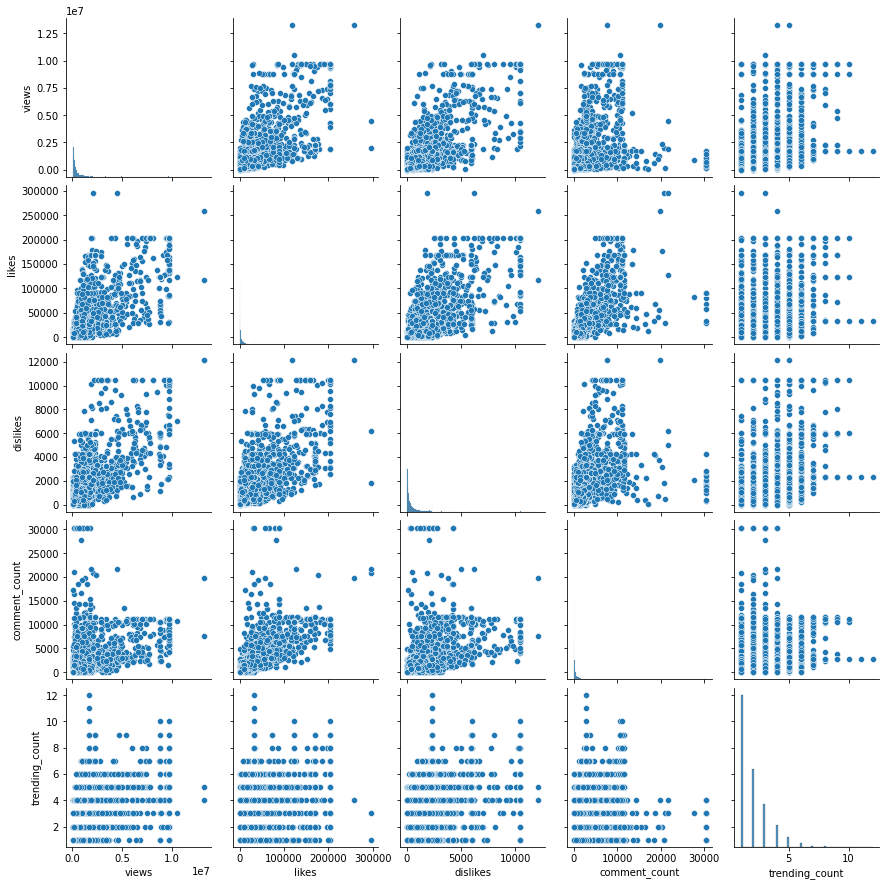

In [11]:
data_reg_pplot = sns.pairplot(data_reg)
data_reg_pplot

In [12]:
data_reg_pplot.figure.savefig('../graphs/pairplot.png')

<AxesSubplot:>

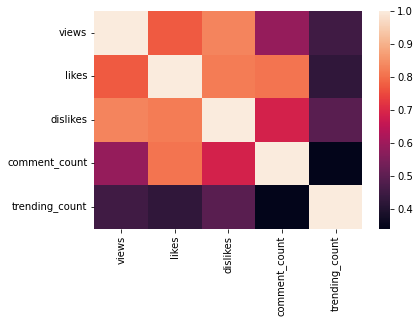

In [15]:
data_reg_hmap = sns.heatmap(data_reg.corr())
data_reg_hmap

In [16]:
data_reg_hmap.figure.savefig('../graphs/heatmap-correlation.png')

#### ¿Es factible predecir el número de “Vistas” o “Me gusta” o “No me gusta”?

##### Vistas

In [114]:
X = data_cat[['dislikes', 'likes']]
y = data_cat['views']

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [116]:
lr = LinearRegression()

In [117]:
lr.fit(X_train, y_train)

LinearRegression()

In [118]:
print(lr.score(X_test, y_test))

0.7521314363843651


##### Me gusta

In [119]:
X = data_cat[['dislikes', 'views']]
y = data_cat['likes']

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [121]:
lr = LinearRegression()

In [122]:
lr.fit(X_train, y_train)

LinearRegression()

In [123]:
print(lr.score(X_test, y_test))

0.8226922684685789


##### No me gusta

In [107]:
X = data_cat[['likes', 'views']]
y = data_cat['dislikes']

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [109]:
lr = LinearRegression()

In [110]:
lr.fit(X_train, y_train)

LinearRegression()

In [111]:
print(lr.score(X_test, y_test))

-3.235156925186689


#### ¿Los videos en tendencia son los que mayor cantidad de comentarios positivos reciben?

Con el dataset presente, no es posible saber que tipo de comentario reciben los videos en tendencia, es por eso que la pregunta no tiene respuesta.